# Introduction: Predicting Diamond Prices

## About the Data

### The Dataset

The goal of this analysis is to predict the `price` of given diamonds, which involves Regression Analysis. We will be working with a dataset containing information about various diamond attributes.

There are 10 independent variables in the dataset (including an `id` field):

* `id`: A unique identifier for each diamond.
* `carat`: Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut`: Quality of Diamond Cut.
* `color`: Color of the Diamond.
* `clarity`: Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of characteristics under 10-power magnification.
* `depth`: The depth of the diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface).
* `table`: A diamond's table is the facet visible when the stone is viewed face up.
* `x`: Diamond X dimension.
* `y`: Diamond Y dimension.
* `z`: Diamond Z dimension.

### Target Variable

The target variable we aim to predict is:

* `price`: Price of the given Diamond.

### Dataset Source Link

The dataset can be found on Kaggle: [ https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv]


In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv(r"C:\Users\gouse\I Nuron\Project_Diamond_price_Predection\notebooks\data\gemstone.csv")

In [ ]:
data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [9]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
data.shape

(193573, 11)

In [11]:
data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [13]:
# we are droping the id column 
data1 = data.drop(labels=["id"],axis= 1)

In [17]:
duplicate_count = data1.duplicated().sum()

print("The duplicates in the data set are ",duplicate_count)

The duplicates in the data sets are  0


In [25]:
# Segrecation of the data based of categoical 
categoical_columns = data1.columns[data1.dtypes == 'object']

In [26]:
numericl_columns = data1.columns[data1.dtypes != 'object']

In [27]:
data1[categoical_columns].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [30]:
data1[categoical_columns]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [31]:
data1[categoical_columns]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [33]:
data1[categoical_columns]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [28]:
data1[numericl_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


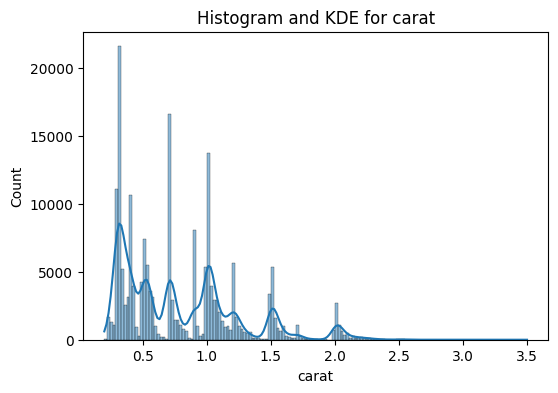

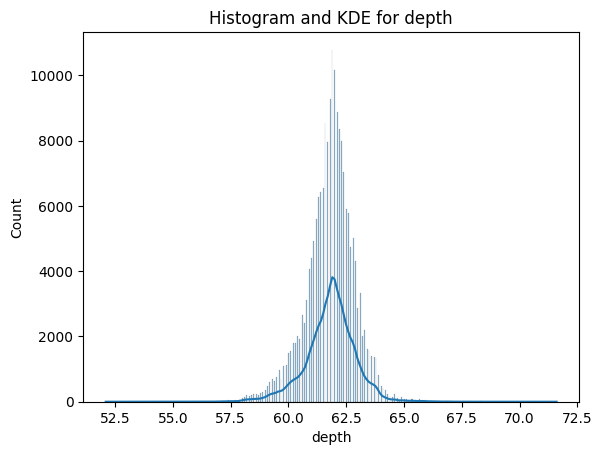

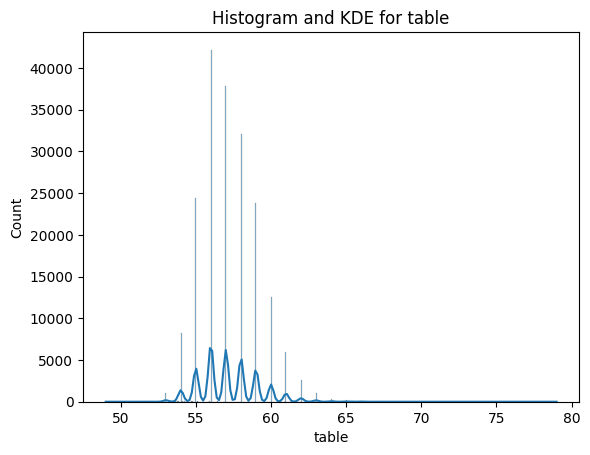

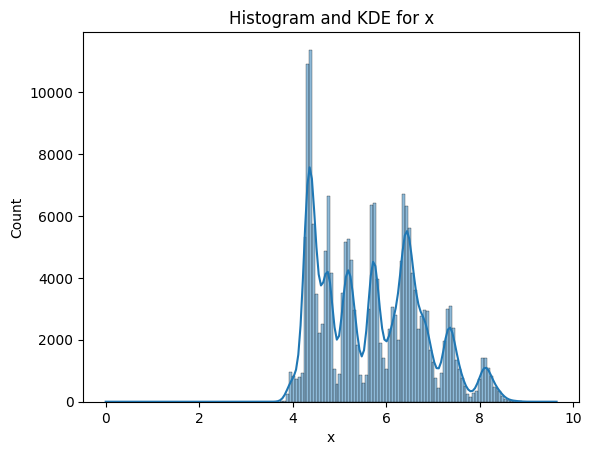

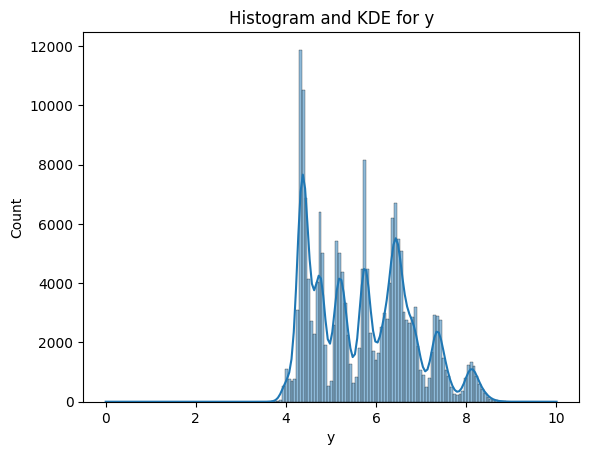

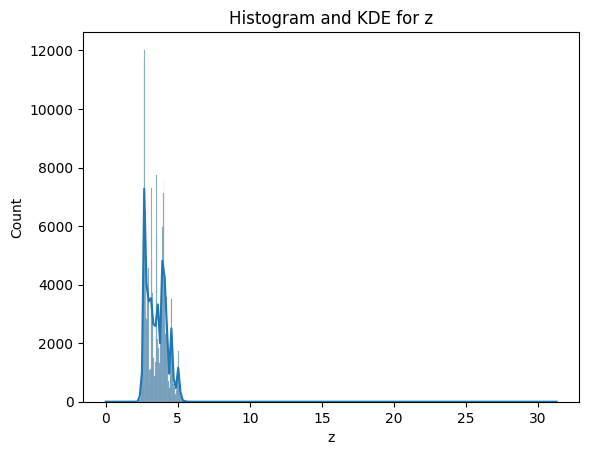

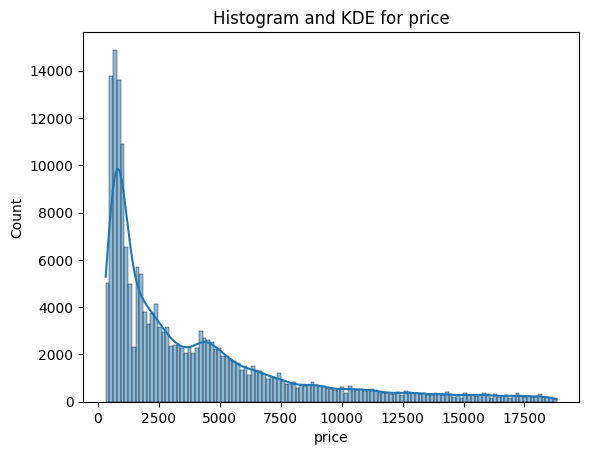

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

for col in numericl_columns:  # Replace 'numericl_columns' with your actual list of numeric columns
    sns.histplot(data=data1, x=col, kde=True)
    plt.title(f"Histogram and KDE for {col}")
    plt.show()
